<a href="https://colab.research.google.com/github/Starlit01Chrysalis/Starlit01Chrysalis/blob/main/device_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the sound file
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving device is detecetd.wav to device is detecetd (1).wav
Uploaded file: device is detecetd (1).wav


THE NEW ONE


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-1 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


None

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


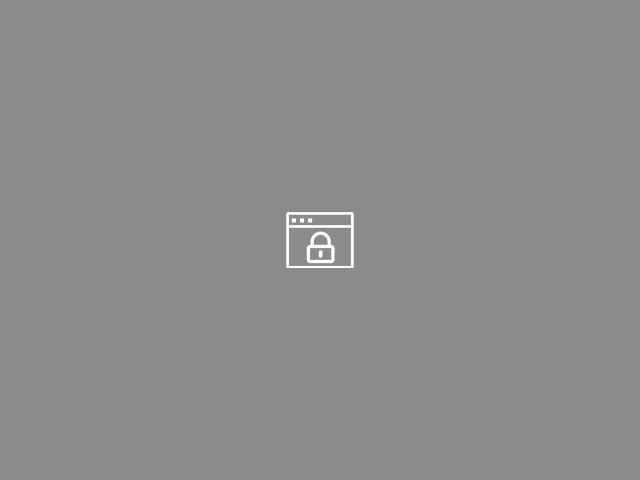

Detected Objects: set()


In [ ]:
import os
import numpy as np
import torch
import cv2
from IPython.display import display, Audio
from google.colab.output import eval_js
import base64
from google.colab.patches import cv2_imshow

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use 'yolov5m' or 'yolov5l' for larger models

def take_photo(filename='photo.jpg', quality=0.8):
    js = '''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    '''
    display(eval_js(js))

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Get OpenCV format image
    img = js_to_image(data)

    return img

def js_to_image(data):
    # Convert base64 image data to an OpenCV format image
    image_data = data.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(image_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

# Capture image from webcam
frame = take_photo('photo.jpg')

# Perform object detection
results = model(frame)

# Get detected classes and their bounding boxes
boxes = results.xyxy[0]  # Get bounding boxes
detected_classes = results.names  # Get class names

detected_objects = []

# Loop through detected objects
for box in boxes:
    x1, y1, x2, y2, conf, class_id = box
    class_name = detected_classes[int(class_id)]
    detected_objects.append(class_name)  # Store detected object names

    # Render results on the frame
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    cv2.putText(frame, f'{class_name} {conf:.2f}', (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Show the captured frame with detected objects using cv2_imshow
cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow

# List of objects to trigger the alert
alert_objects = ['cell phone', 'laptop']
print("Detected Objects:", set(detected_objects))  # Display unique detected objects

# Check if any alert objects are detected
alert_triggered = any(obj in detected_objects for obj in alert_objects)


In [ ]:
# Define the path to the uploaded alert sound file (it will use the uploaded filename)
alert_sound_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Play the alert sound if an alert is triggered
if alert_triggered:
    print("Alert! Detected object: ", [obj for obj in detected_objects if obj in alert_objects])
    # Try to load and play the audio file using the 'filename' parameter of Audio
    try:
        display(Audio(filename=alert_sound_path, autoplay=True))  # Play alert sound
    except Exception as e:
        print(f"Error playing audio: {e}")  # Print error if audio playback fails
else:
    print("No alert objects detected.")


No alert objects detected.
